<a href="https://colab.research.google.com/github/crey283/capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee Score Prediction App
Below is a jupyter notebook that uses supervised multiple linear regression to predict what a potential coffee score.

## Usage
Select **Runtime > Run all**

At the bottom you will be able to input region, variety, and processing method to find potential coffee scores.



# Data -> ML Model:
First we'll import our coffee data to build our model.

In [4]:
#This block sets up all the import statements

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import ipywidgets as widgets
from IPython.display import display

In [5]:
#This block imports the data and sets up one hot values
coffee_data = pd.read_csv('./coffee.csv')
coffee_data_encoded = pd.get_dummies(coffee_data, columns=['region', 'variety', 'method'])

In [6]:
# Sets up independant and dependent variables,
X = coffee_data_encoded.drop('score', axis=1)
Y = coffee_data_encoded['score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [7]:
#Sets up and trains model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Model Accuracy
Identifies how accurate the model is to the data. This is done by finding the mean squared error.

In [8]:

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
print(f"Mean squared error: {mse}")

Mean squared error: 2.655462723062221e+26


#Descriptive Method and Visualizations
## Coffee Variety Usage
The bar chart below shows how often certain varieties of coffee are being used, this is helpful to explore what less used varietes may be viable for trialing in other regions.

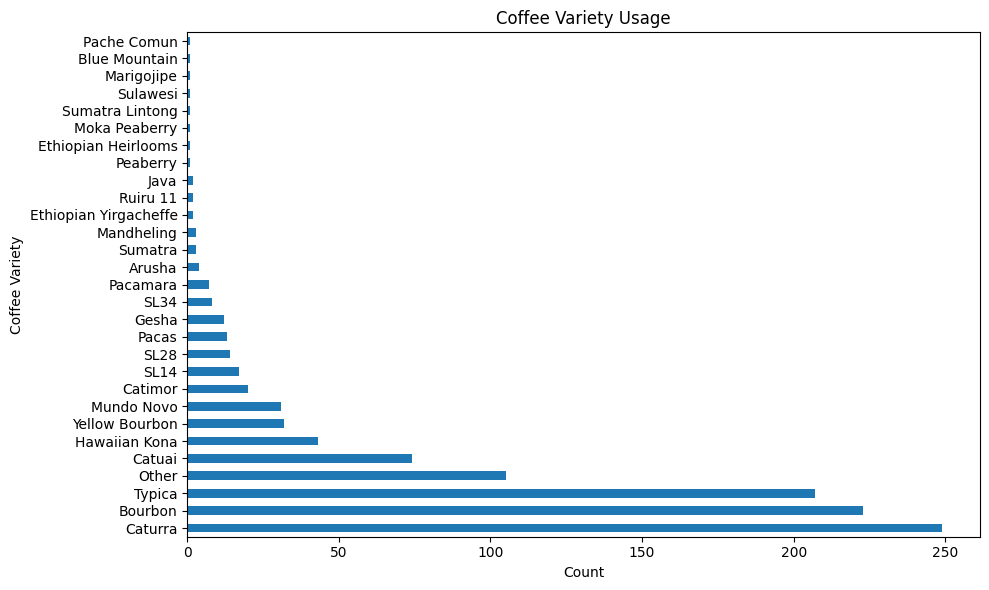

In [9]:
variety_counts = coffee_data['variety'].value_counts()

plt.figure(figsize=(10,6))
variety_counts.plot(kind='barh')
plt.title('Coffee Variety Usage')
plt.ylabel('Coffee Variety')
plt.xlabel('Count')
plt.tight_layout()

plt.show()

## Distribution of coffee scores
The histogram below shows that coffee, here we can see that coffee scores center around 83. If we establish our requirement for a good coffee to be 1.5 standard deviations above the mean then we can try to find paremeters that output that value.

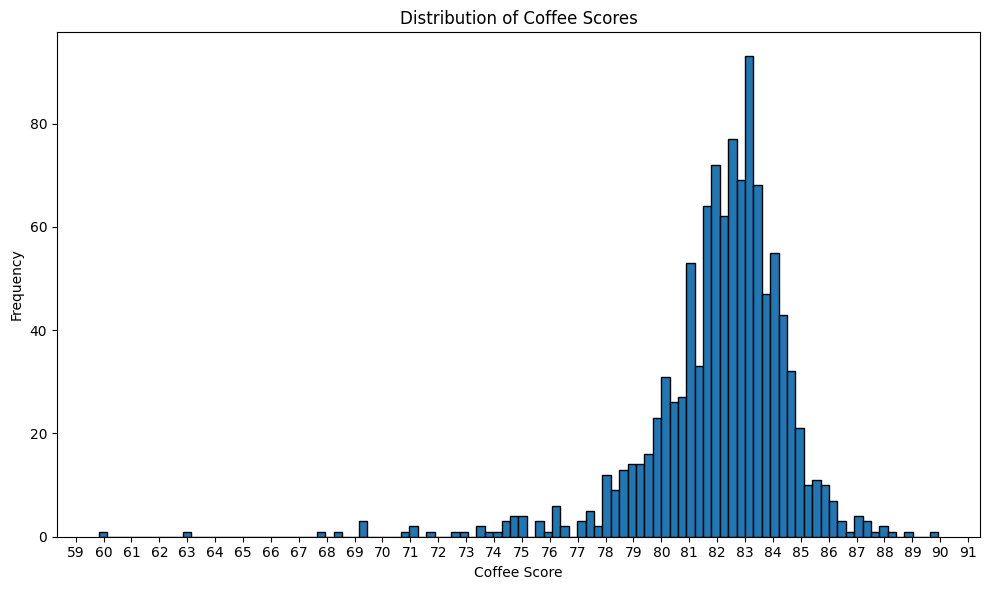

In [10]:
plt.figure(figsize=(10,6))
plt.hist(coffee_data['score'], bins=100, edgecolor='black')
plt.title('Distribution of Coffee Scores')
plt.xlabel('Coffee Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.locator_params(axis='x', nbins=50)

plt.show()

## Scatter Plot of Coffee Variety vs Coffee Score by Processing Method
Here we can see that no discernable trends appear within the data for the metrics provided.

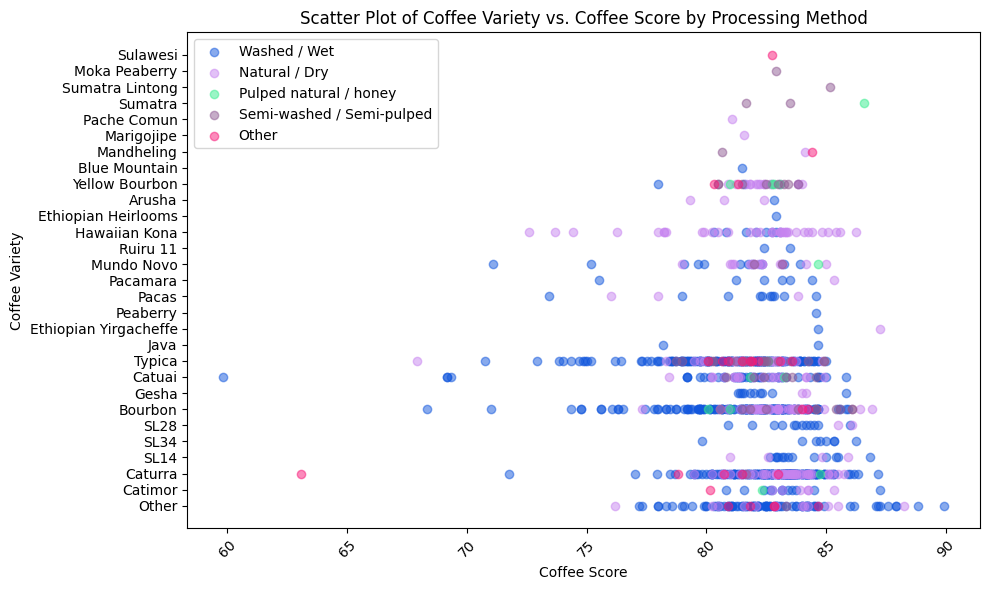

In [19]:
unique_methods = coffee_data['method'].unique()

method_colors = {method: f'#{random.randint(0, 0xFFFFFF):06x}' for method in unique_methods}

plt.figure(figsize=(10, 6))
for method, color in method_colors.items():
    subset = coffee_data[coffee_data['method'] == method]
    plt.scatter(subset['score'], subset['variety'], color=color, label=method, alpha=0.5)

plt.title('Scatter Plot of Coffee Variety vs. Coffee Score by Processing Method')
plt.ylabel('Coffee Variety')
plt.xlabel('Coffee Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Anova Table on Input parameters
Using the ANOVA table below we can see Region has a very low P-Value indicating it has the most impact on score followed by Variety having a noticeable effect. As seen above in the scatter plot we can see that processing method doesn't have much of an impact.

In [12]:
X_with_intercept = sm.add_constant(X)

model_formula = 'Q("score") ~ region + variety + method'

model = ols(model_formula, data=coffee_data).fit()

anova_table = anova_lm(model)

print(anova_table)

             df       sum_sq    mean_sq         F        PR(>F)
region    310.0  3474.917916  11.209413  2.225593  1.072807e-18
variety    28.0   242.134317   8.647654  1.716964  1.244949e-02
method      4.0    29.991446   7.497861  1.488676  2.037547e-01
Residual  743.0  3742.190696   5.036596       NaN           NaN


## Box plot of Coffee Score by Variety
On the box plot below we can see several candidates for coffee varieties that show promise, either by using an uncommon variety denoted by other using a known variety of catimor or yirgacheffe.

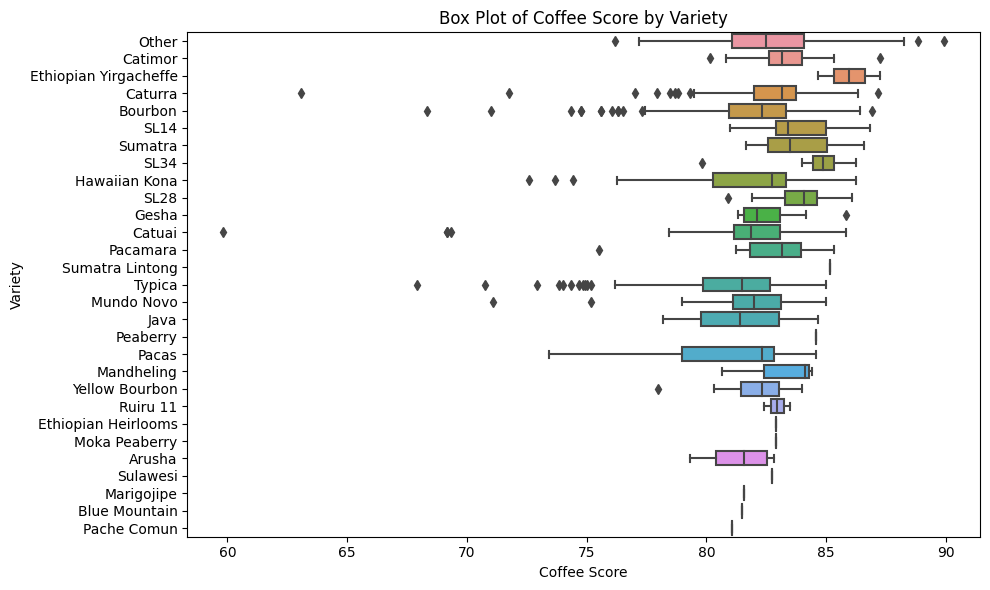

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='variety', data=coffee_data)
plt.title('Box Plot of Coffee Score by Variety')
plt.ylabel('Variety')
plt.xlabel('Coffee Score')
plt.tight_layout()

plt.show()

## Coffee Scores for Regions with Z-Score > 1.5
Since region has the largest impact on the quality of coffee we can look to see which regions have a high likelihood to produce coffee scores above 1.5 Standard Deviation above the mean.

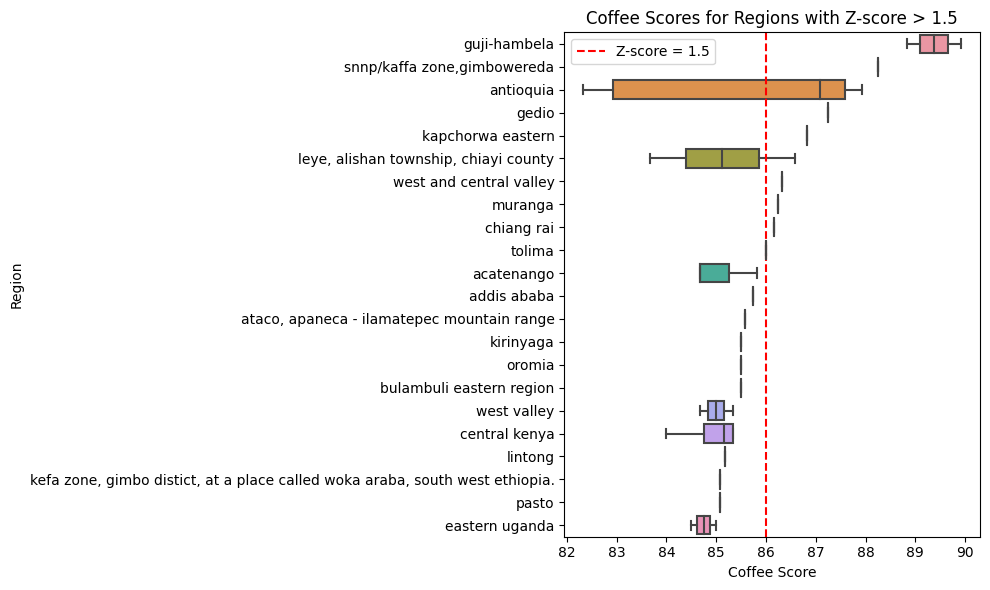

In [18]:
mean_score = coffee_data['score'].mean()
std_deviation = coffee_data['score'].std()
coffee_data['Z-score'] = (coffee_data['score'] - mean_score) / std_deviation
average_z_scores = coffee_data.groupby('region')['Z-score'].mean()
high_z_regions = average_z_scores[average_z_scores > 1]
high_z_data = coffee_data[coffee_data['region'].isin(high_z_regions.index)]
plt.figure(figsize=(10, 6))
sns.boxplot(y='region', x='score', data=high_z_data)
plt.axvline(x=mean_score + (1.5 * std_deviation), color='r', linestyle='--', label='Z-score = 1.5')
plt.title('Coffee Scores for Regions with Z-score > 1.5')
plt.ylabel('Region')
plt.xlabel('Coffee Score')
plt.legend()
plt.tight_layout()

plt.show()




#Non-Descriptive Method / User Interface
Using our model and insights gained from our visualizations. We can try and predict some coffees that have a high chance of scoring well.

### Usage
Select the region, variety and method from the drop downs and then re-run the bottom block.

*Note: Don't rerun the block with the drop downs, it won't generate the score you seek and is only used to select the values*

In [23]:
unique_regions = coffee_data['region'].unique()
unique_varieties = coffee_data['variety'].unique()
unique_methods = coffee_data['method'].unique()

region_dropdown = widgets.Dropdown(options=unique_regions, description='Region:')
variety_dropdown = widgets.Dropdown(options=unique_varieties, description='Variety:')
method_dropdown = widgets.Dropdown(options=unique_methods, description='Method:')

display(region_dropdown, variety_dropdown, method_dropdown)

Dropdown(description='Region:', options=('guji-hambela', 'snnp/kaffa zone,gimbowereda', 'antioquia', 'yunnan',…

Dropdown(description='Variety:', options=('Other', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'Bourbon', '…

Dropdown(description='Method:', options=('Washed / Wet', 'Natural / Dry', 'Pulped natural / honey', 'Semi-wash…

### Demo:

Inputting Guji-Hambela, Ethipoian Yirgacheffe, and Semi-Washed / Semi-Pulped we can generate a candidate for a potential coffee with a predicted score higher than any of our input data.

In [28]:
user_region = region_dropdown.value
user_variety = variety_dropdown.value
user_method = method_dropdown.value

user_data = pd.DataFrame({
    'region': [user_region],
    'variety': [user_variety],
    'method': [user_method]
})
predicted_score = model.predict(user_data)

print(f"User Input - Region: {user_region}, Variety: {user_variety}, Method: {user_method}")
print(f"Predicted Coffee Score: {predicted_score.values[0]}")


User Input - Region: guji-hambela, Variety: Ethiopian Yirgacheffe, Method: Semi-washed / Semi-pulped
Predicted Coffee Score: 91.40417124218013
